# Assignment 5 - Web Scraping

In [2]:
import requests

In [3]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/')

In [4]:
response

<Response [200]>

In [5]:
from bs4 import BeautifulSoup

In [6]:
document = BeautifulSoup(response.text, "html.parser")

In [7]:
document

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>CORGIS Datasets Project</title>
<meta content="






            Github Pages for CORGIS Datasets Project" name="description"/>
<link href="https://corgis-edu.github.io//corgis/csv/" rel="canonical"/>
<link href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" rel="stylesheet"/>
<link href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css" rel="stylesheet"/>
<link href="/corgis/assets/css/main.css" rel="stylesheet"/>
<script src="/corgis/assets/js/jquery-3.3.1.min.js"></script>
<script crossorigin="anonymous" integrity="sha256-VazP97ZCwtekAsvgPBSUwPFKdrwD3unUfSGVYrahUqU=" src="https://code.jquery.com/ui/1.12.1/jquery-ui.min.js"></script>
<script crossorigin="anonymous" integrity="sha256-M5ZomNNnrnEB2WjSbnty5GWGqq6UuAAVNnWECisgEis=" sr

## creating a list of all the CORGIS datasets

In [8]:
dataset_list = document.find_all('h3')

In [9]:
dataset_list

[<h3>Aids</h3>,
 <h3>Airlines</h3>,
 <h3>Billionaires</h3>,
 <h3>Broadway</h3>,
 <h3>Business Dynamics</h3>,
 <h3>Cancer</h3>,
 <h3>Cars</h3>,
 <h3>Classics</h3>,
 <h3>Construction Permits</h3>,
 <h3>Construction Spending</h3>,
 <h3>County Demographics</h3>,
 <h3>Covid</h3>,
 <h3>Drugs</h3>,
 <h3>Earthquakes</h3>,
 <h3>Election</h3>,
 <h3>Electricity</h3>,
 <h3>Emissions</h3>,
 <h3>Energy</h3>,
 <h3>Finance</h3>,
 <h3>Food</h3>,
 <h3>Food Access</h3>,
 <h3>Global Development</h3>,
 <h3>Graduates</h3>,
 <h3>Health</h3>,
 <h3>Hospitals</h3>,
 <h3>Hydropower</h3>,
 <h3>Ingredients</h3>,
 <h3>Injuries</h3>,
 <h3>Labor</h3>,
 <h3>Medal Of Honor</h3>,
 <h3>Music</h3>,
 <h3>Opioids</h3>,
 <h3>Police Shootings</h3>,
 <h3>Publishers</h3>,
 <h3>Real Estate</h3>,
 <h3>Retail Services</h3>,
 <h3>School Scores</h3>,
 <h3>Skyscrapers</h3>,
 <h3>Slavery</h3>,
 <h3>State Crime</h3>,
 <h3>State Demographics</h3>,
 <h3>State Fragility</h3>,
 <h3>Suicide Attacks</h3>,
 <h3>Supreme Court</h3>,
 <h3>Tate</

## Step 3

Write a function that takes an element from the list of CORGIS datasets, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe.

In [10]:
import pandas as pd

In [11]:
def pdcorgis(a):
    
    # converting the dataset to lowercase
    a.lower()
    
    # getting the website's HTML 
    new_response = requests.get('https://corgis-edu.github.io/corgis/csv/' + a + '/')
    
    # searching for all the HTML link elements on the page
    html_string = new_response.text
    document = BeautifulSoup(html_string, "html.parser")
    
    # downloading the CSV link
    for i in document.find_all('a'):
        if i.has_attr('download') == True:
            csv = i['href']
            download_link = 'https://corgis-edu.github.io/corgis/csv/' + a + '/' + csv
            corgisdf = pd.read_csv(download_link)
            
            return corgisdf

In [12]:
emissions_df = pdcorgis("emissions")

In [13]:
emissions_df.head()

,Country,Year,Emissions.Type.CO2,Emissions.Type.N2O,Emissions.Type.CH4,Emissions.Sector.Power Industry,Emissions.Sector.Buildings,Emissions.Sector.Transport,Emissions.Sector.Other Industry,Emissions.Sector.Other sectors,Ratio.Per GDP,Ratio.Per Capita
0,Afghanistan,1970,2670.0,1820.0,12800.0,0.06,0.58,0.23,0.07,0.53,1.557705,0.0
1,Afghanistan,1971,2630.0,1850.0,12900.0,0.06,0.58,0.23,0.07,0.53,1.517670,0.0
2,Afghanistan,1972,2180.0,1810.0,11900.0,0.12,0.46,0.27,0.05,0.61,1.357590,0.0
3,Afghanistan,1973,2310.0,1830.0,11600.0,0.17,0.57,0.24,0.02,0.47,1.307901,0.0
4,Afghanistan,1974,2520.0,2190.0,12800.0,0.21,0.77,0.24,0.03,0.65,1.425016,0.0


## Step 4

In [82]:
# creating a line plot of Afghanistan Emissions per GDP from 1970 to 1979

Text(0.5, 1.0, 'Afghanistan Emissions per GDP from 1970-1979')

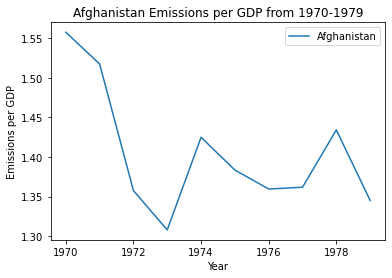

In [14]:
new_emissions = emissions_df.loc[0:9,['Country', 'Year','Ratio.Per GDP']]
x = new_emissions.plot(kind='line', x='Year', y= 'Ratio.Per GDP')

x.legend(['Afghanistan'])
x.set_xlabel('Year')
x.set_ylabel('Emissions per GDP')
x.set_title('Afghanistan Emissions per GDP from 1970-1979')

In [83]:
# creating a bar graph of covid cases by country on November 5th, 2020

In [15]:
covid_df = pdcorgis("covid")

In [16]:
covid_df.head()

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,31,12,2019,0,0,Afghanistan,AFG,38041757,Asia,0.0
1,31,12,2019,0,0,Algeria,DZA,43053054,Africa,0.0
2,31,12,2019,0,0,Armenia,ARM,2957728,Europe,0.0
3,31,12,2019,0,0,Australia,AUS,25203200,Oceania,0.0
4,31,12,2019,0,0,Austria,AUT,8858775,Europe,0.0


In [17]:
covid_df.tail()

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
53624,10,12,2020,202,16,Afghanistan,AFG,38041757,Asia,6.968658
53625,11,12,2020,63,10,Afghanistan,AFG,38041757,Asia,7.134266
53626,12,12,2020,113,11,Afghanistan,AFG,38041757,Asia,6.868768
53627,13,12,2020,298,9,Afghanistan,AFG,38041757,Asia,7.052776
53628,14,12,2020,746,6,Afghanistan,AFG,38041757,Asia,9.013779


In [ ]:
# finding a data range of all countries on a specific date 

In [48]:
covid_df.loc[53379:53589]

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
53379,5,11,2020,121,6,Afghanistan,AFG,38041757,Asia,3.745884
53380,5,11,2020,396,4,Albania,ALB,2862427,Europe,152.038812
53381,5,11,2020,548,10,Algeria,DZA,43053054,Africa,10.303566
53382,5,11,2020,135,0,Andorra,AND,76177,Europe,1619.911522
53383,5,11,2020,349,2,Angola,AGO,31825299,Africa,11.085520
...,...,...,...,...,...,...,...,...,...,...
53585,5,11,2020,0,0,Wallis_and_Futuna,NaN,-1,Oceania,0.000000
53586,5,11,2020,0,0,Western_Sahara,ESH,582458,Africa,0.000000
53587,5,11,2020,0,0,Yemen,YEM,29161922,Asia,0.020575
53588,5,11,2020,37,0,Zambia,ZMB,17861034,Africa,3.907948


In [49]:
new_covid = covid_df.loc[53379:53589,['Location.Country','Data.Cases']]
new_covid

,Location.Country,Data.Cases
53379,Afghanistan,121
53380,Albania,396
53381,Algeria,548
53382,Andorra,135
53383,Angola,349
...,...,...
53585,Wallis_and_Futuna,0
53586,Western_Sahara,0
53587,Yemen,0
53588,Zambia,37


Text(0.5, 1.0, 'COVID-19 Cases by Country on November 5th, 2020')

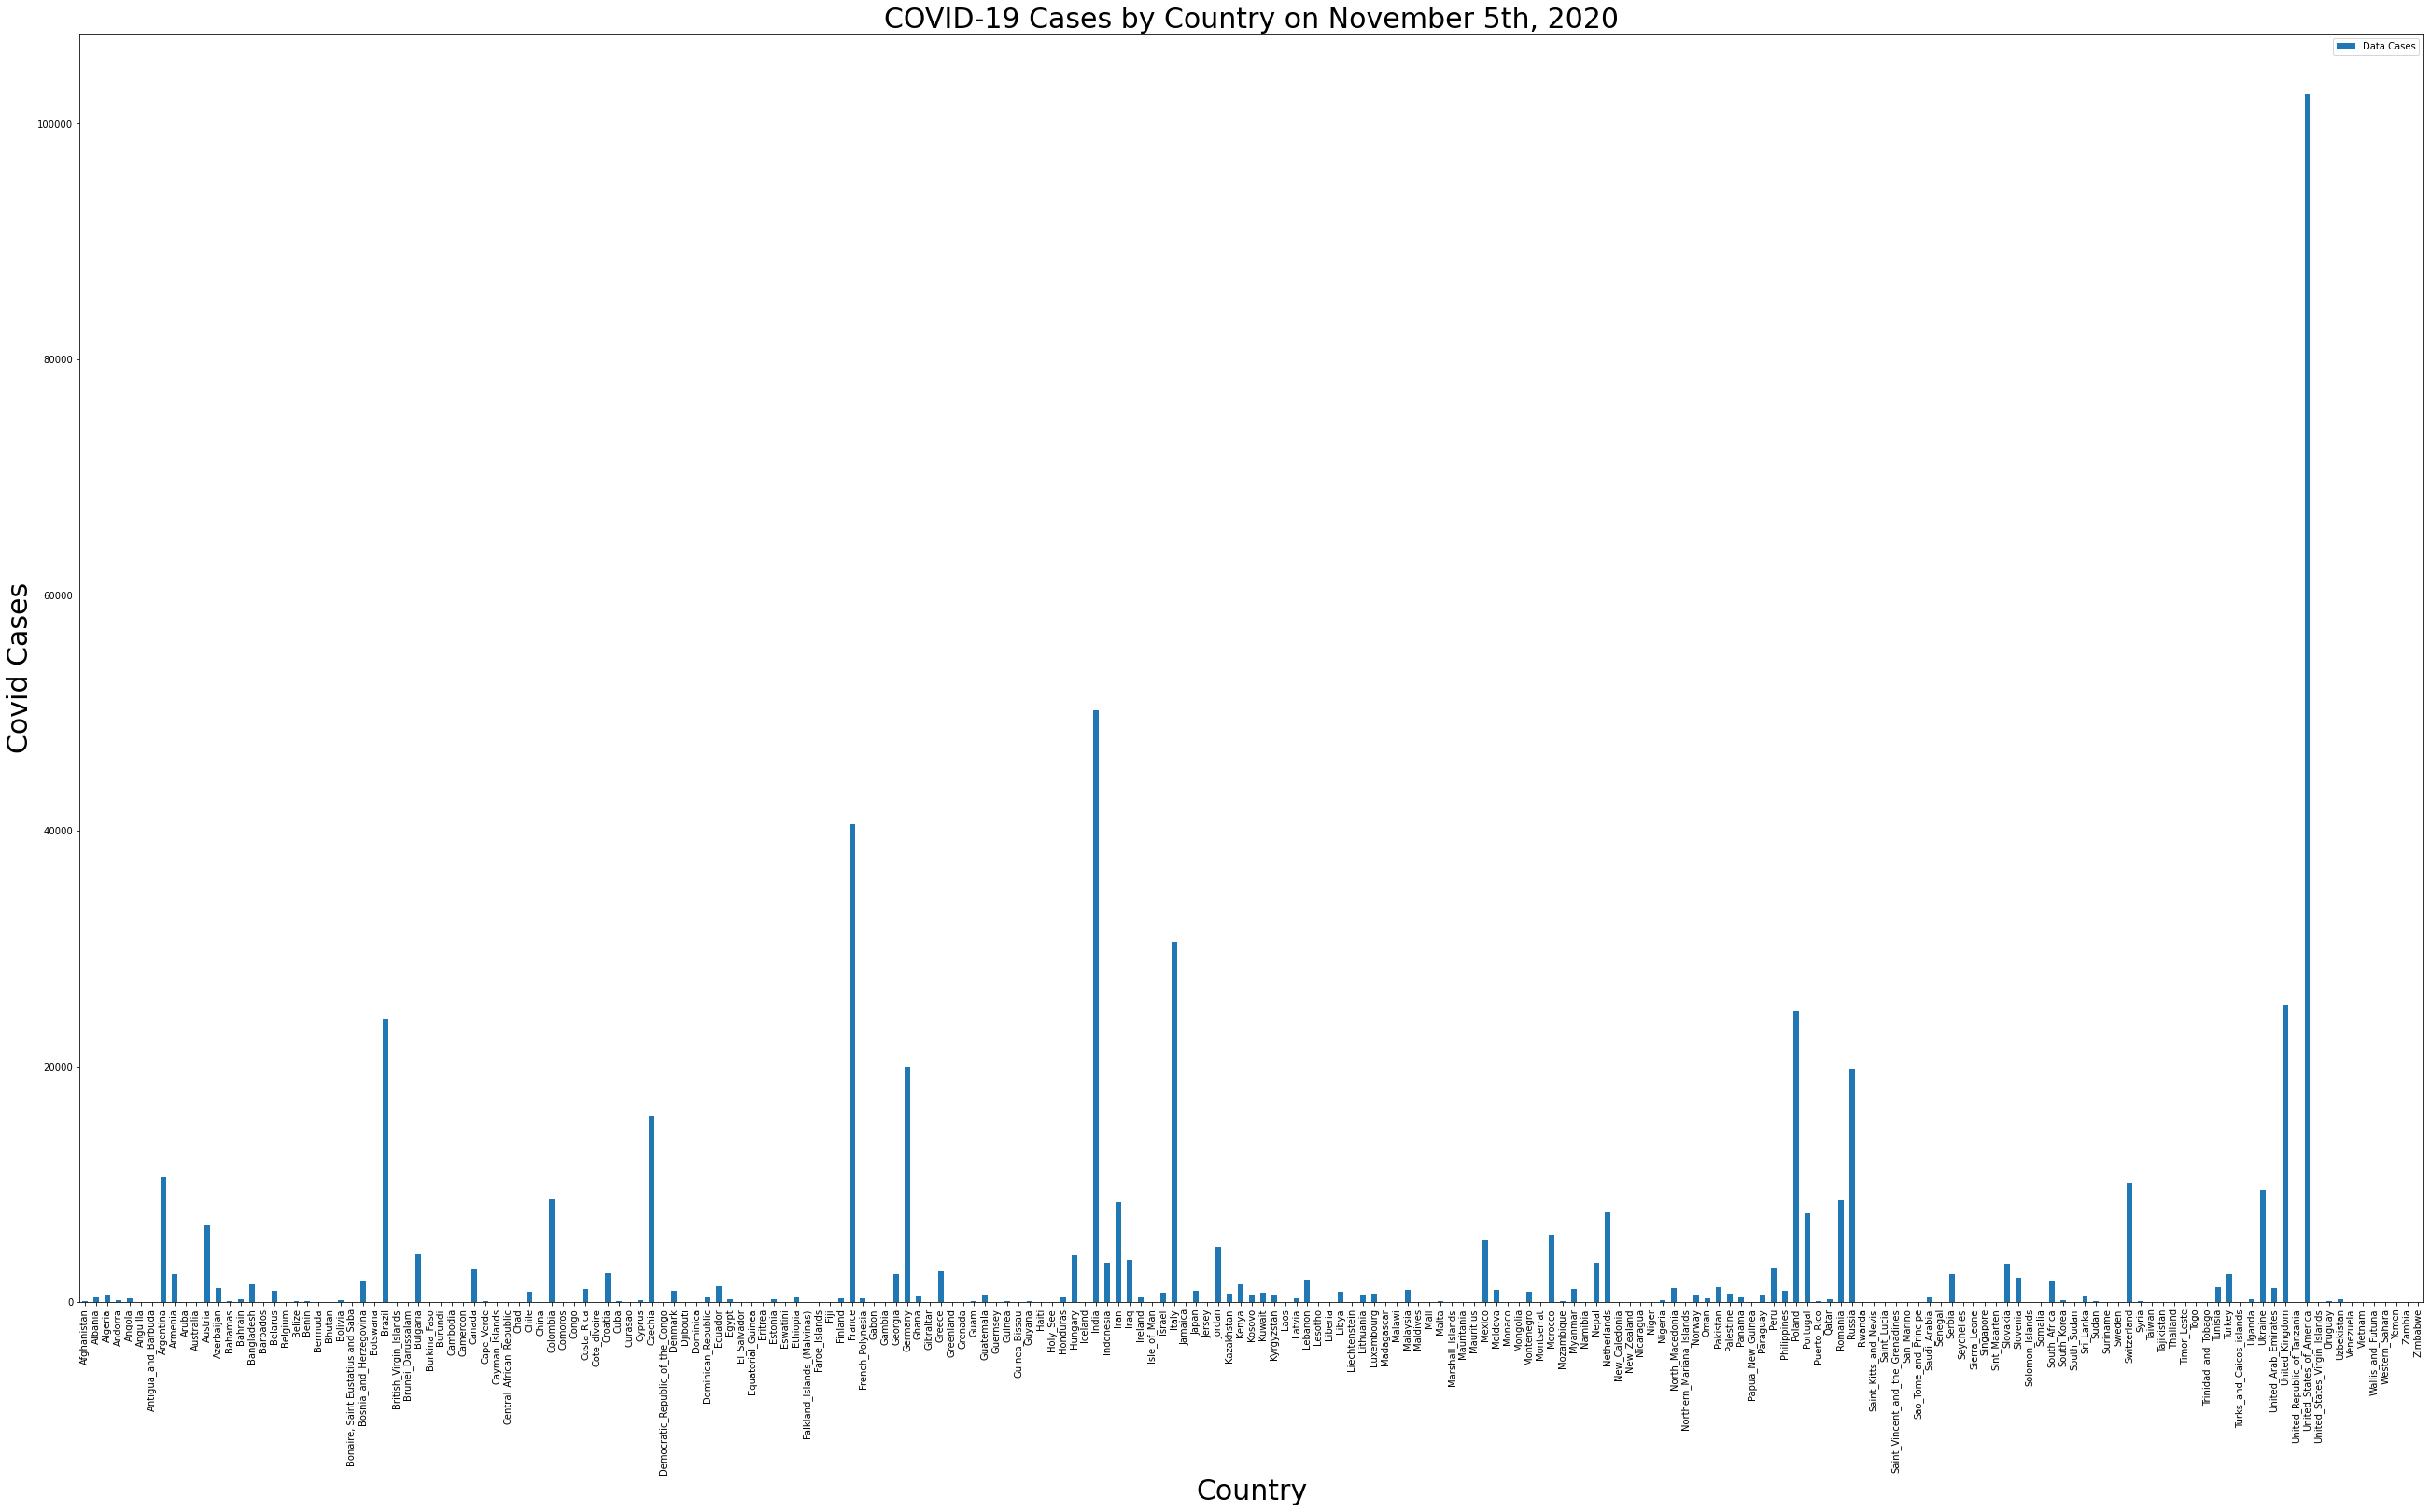

In [63]:
c = new_covid.plot(kind='bar', x='Location.Country', y= 'Data.Cases', figsize = (45,25))

c.set_xlabel('Country', fontsize=30)
c.set_ylabel('Covid Cases', fontsize=30)
c.set_title('COVID-19 Cases by Country on November 5th, 2020', fontsize=30)

In [84]:
# creating a histogram to show attendance at Broadway shows

In [85]:
broadway_df = pdcorgis("broadway")

In [86]:
broadway_df.head()

,Date.Day,Date.Full,Date.Month,Date.Year,Show.Name,Show.Theatre,Show.Type,Statistics.Attendance,Statistics.Capacity,Statistics.Gross,Statistics.Gross Potential,Statistics.Performances
0,26,8/26/1990,8,1990,Tru,Booth,Play,5500,88,134456,0,8
1,24,3/24/1991,3,1991,Miss Saigon,Broadway,Musical,1737,100,100647,0,0
2,31,3/31/1991,3,1991,Miss Saigon,Broadway,Musical,12160,100,634424,0,0
3,7,4/7/1991,4,1991,Miss Saigon,Broadway,Musical,13921,100,713353,0,0
4,14,4/14/1991,4,1991,Miss Saigon,Broadway,Musical,10973,90,573981,0,4


In [68]:
broadway_df.tail()

,Date.Day,Date.Full,Date.Month,Date.Year,Show.Name,Show.Theatre,Show.Type,Statistics.Attendance,Statistics.Capacity,Statistics.Gross,Statistics.Gross Potential,Statistics.Performances
31291,14,8/14/2016,8,2016,The Humans,Schoenfeld,Play,7234,87,603770,62,8
31292,14,8/14/2016,8,2016,The Lion King,Minskoff,Musical,13485,99,2233894,97,8
31293,14,8/14/2016,8,2016,The Phantom Of The Opera,Majestic,Musical,10966,85,999632,66,8
31294,14,8/14/2016,8,2016,Waitress,Brooks Atkinson,Musical,8058,96,990128,97,8
31295,14,8/14/2016,8,2016,Wicked,Gershwin,Musical,13804,95,1779664,100,8


In [70]:
new_broadway = broadway_df['Statistics.Attendance']
new_broadway

0         5500
1         1737
2        12160
3        13921
4        10973
         ...  
31291     7234
31292    13485
31293    10966
31294     8058
31295    13804
Name: Statistics.Attendance, Length: 31296, dtype: int64

Text(0.5, 1.0, 'Broadway Show Attendance')

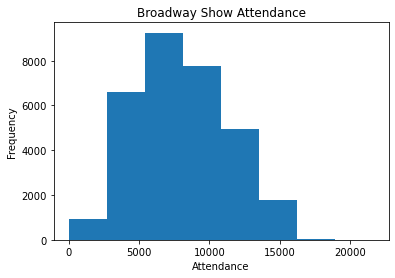

In [89]:
b = new_broadway.plot(kind='hist', bins = 8)

b.set_xlabel('Attendance')
b.set_title('Broadway Show Attendance')